# 2. Run an election

In this notebook, I will explain how to run an election on a voting profile with embedded voters.

In [5]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt

np.random.seed(42)

## Creating the profile

Let's say we have **5 candidates** and **3 groups** of voters :
   * The **<font color="red">red group</font>** contains **50%** of the voters, and the average scores of candidates given by this group are $[0.9,0.3,0.5,0.2,0.2]$.
   * The **<font color="green">green group</font>** contains **25%** of the voters, and the average scores of candidates given by this group are $[0.2,0.6,0.5,0.5,0.8]$.
   * The **<font color="blue">blue group</font>** contains **25%** of the voters, and the average scores of candidates given by this group are $[0.2,0.6,0.5,0.8,0.5]$.

In [6]:
scores_matrix = np.array([[.9, .3, .5, .3, .2], [.2, .6, .5, .5, .8], [.2, .6, .5, .8, .5]])
proba = [.5, .25, .25]
    
profile = ev.ParametricProfile(5, 3, 100, scores_matrix, proba)
profile.set_parameters(polarisation=0.4, coherence=0.8)

We can **visualize** this profile, as explained in the first notebook :

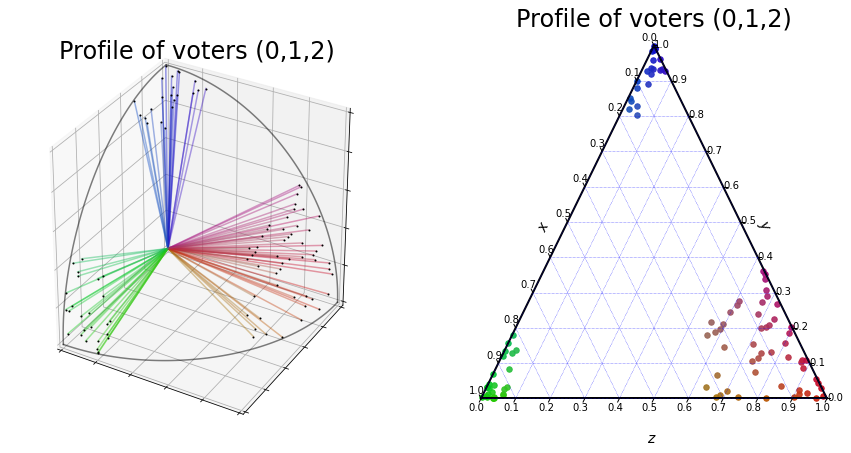

In [7]:
fig = plt.figure(figsize=(15,7.5))
profile.plot_profile("3D", fig=fig, position=[1,2,1], show=False)
profile.plot_profile("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

And we can also **visualize the candidates**. Each voter is represented by a line and the length of the line represents the score the voter gives to the candidate.

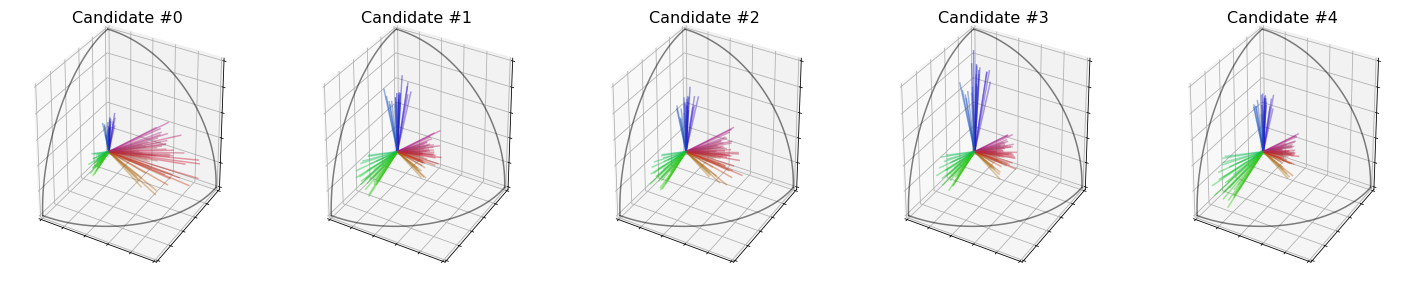

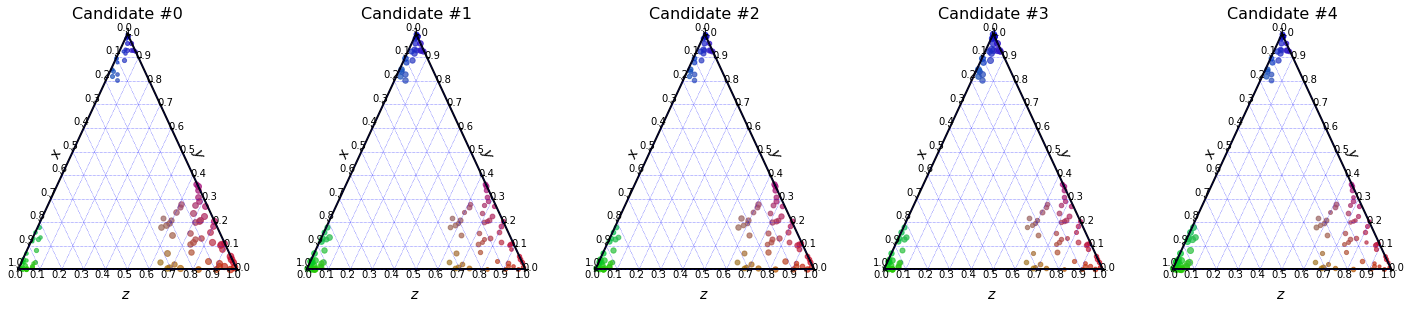

In [8]:
profile.plot_candidates("3D")
profile.plot_candidates("ternary")

Now, we want to determine the **best candidate**. Is it the *Candidate 0*, which is loved by the majority group? Or is it the *Candidate 2*, which is not hated by any group ?

To decide that, we can use a whole set of voting rules. First, there is the **simple rules**, which are not based on the embeddings. These rules are *Range voting* (we take the average score) and *Nash voting* (we take the product of the score, or the average log score).

## Notations

In the following parts of the notebook, I will use some notations :

| Notation  | Meaning               |
|-----------|-----------------------|
| $v_i$     | The $i^{th}$ voter    |
| $c_j$     | The $j^{th}$ candidate|
| $s_i(c_j)$| The score given by the voter $v_i$ to the candidate $c_j$|
| $S(c_j)$  | The score of the candidate $c_j$ after the aggregation |
| $w(c_j)$  | The welfare of candidate $c_j$ |




## Simple rules

### Average score *(Nash voting)*

This is the **most intuitive rule** when we need to aggregate the score of the different voters to establish a ranking of the candidate. We simply take the sum of every vote given to this candidate :

$$
\forall j, S(c_j) = \sum_i s_i(c_j)
$$

We create the election in the following cell.

In [5]:
election = ev.SumScores(profile)

We can also **change** the profile of voter of the election by calling the election on a new profile.

In [9]:
election = ev.SumScores()
election(profile)

Then, we can compute the **score** of every candidate, their **ranking**, and of course the **winner** of the election :

In [7]:
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)

Scores :  [56.761438002447086, 45.49029032993445, 48.93850508360475, 47.17761875058029, 42.091109506822484]
Ranking :  [0 2 3 1 4]
Winner :  0


We can also compute the welfare of each candidate, where the welfare is defined as :

$$
w(c_j) = \frac{S(c_j) - \min_c S(c)}{\max_c S(c) - \min_c S(c)}
$$

In [8]:
print('Welfare : ', result.welfare_)

Welfare :  [1.         0.23170448 0.46675135 0.34672088 0.        ]


We can **plot the winner** of the election using the function <tt>plot_winner()</tt>.

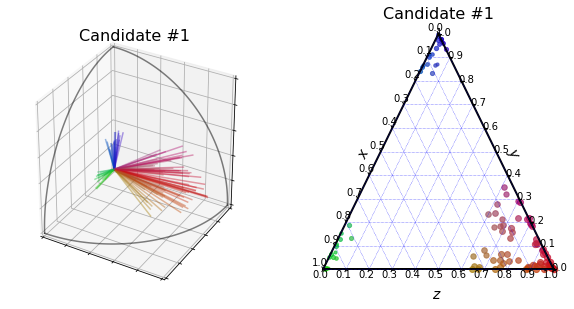

In [9]:
fig = plt.figure(figsize=(10,5))
result.plot_winner("3D", fig=fig, position=[1,2,1], show=False)
result.plot_winner("ternary", fig=fig, position=[1,2,2], show=False)
plt.show()

We can **plot the ranking** of the election using the function <tt>plot_ranking()</tt>.

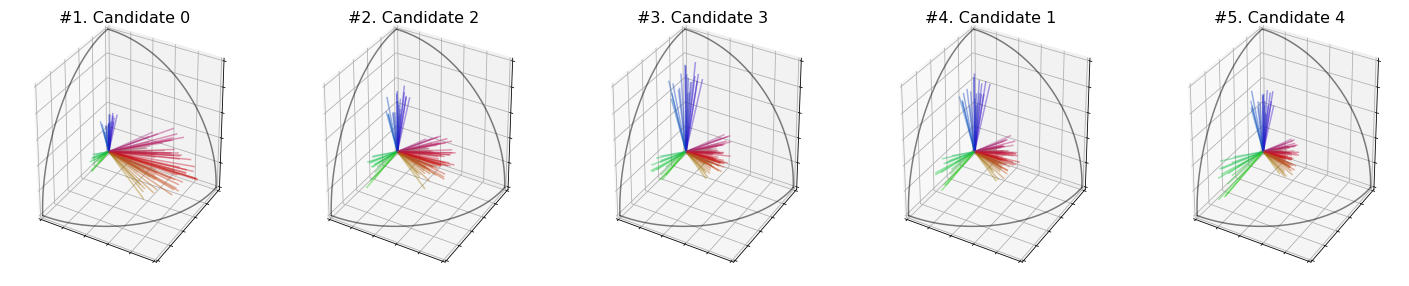

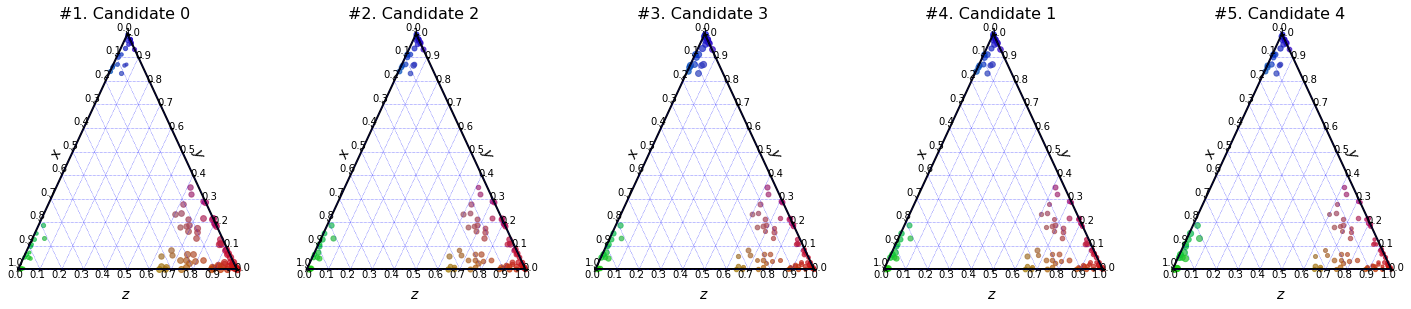

In [10]:
result.plot_ranking("3D")
result.plot_ranking("ternary")

### Product of scores (Nash)

The second intuitive rule is **the product of the scores**, also called *Nash welfare*. It is equivalent to the sum of the log of the scores.

We have

$$
S(c_j) = \prod_i s_i(c_j) = e^{\sum_i \log(s_i(c_j))}
$$

Scores :  [(100, 5.393919173647501e-37), (100, 4.7326054849600145e-33), (100, 5.081774294049027e-31), (100, 2.4593338907274875e-32), (100, 3.2576919258312143e-35)]
Ranking :  [2, 3, 1, 4, 0]
Winner :  2


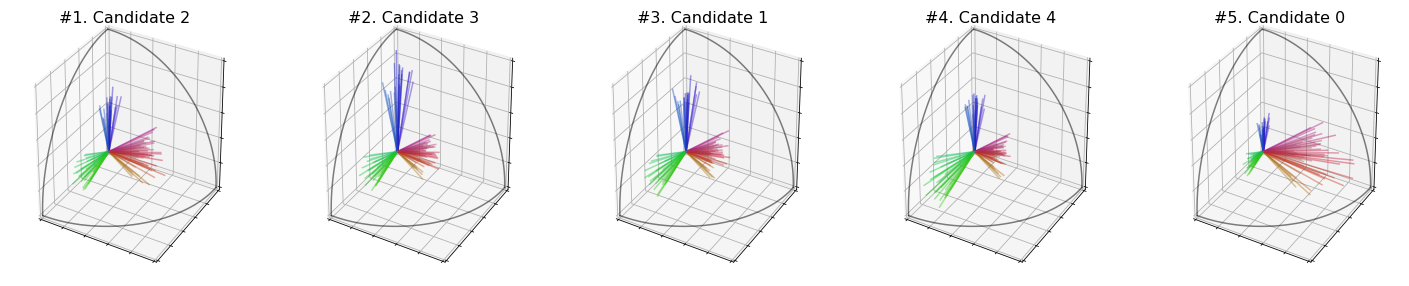

In [10]:
result = ev.ProductScores(profile)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

You probably notice that scores are **composed of two elements** (e.g <tt>(100, 5.393919173647501e-37)</tt>). In this particular case, the first element is the number of non-zero scores and the second one is the product of the non-zero scores. Indeed, if some voter gives a score of $0$ to every candidate, the product of scores will be $0$ for every candidate and we cannot establish a ranking.

We use similar ideas for some of the rules that will come later.

## Geometrical rules

All the rules that I will describe now are **using the embeddings** of the voters. Some of them are purely **geometrical**, other are more **algebraic**. Let's start with the geometrical ones.

### Zonotope

Scores :  [(3, 10455.495536523633), (3, 10458.556246680391), (3, 10947.10437525187), (3, 10937.129672805007), (3, 9455.354473952666)]
Ranking :  [2 3 1 0 4]
Winner :  2


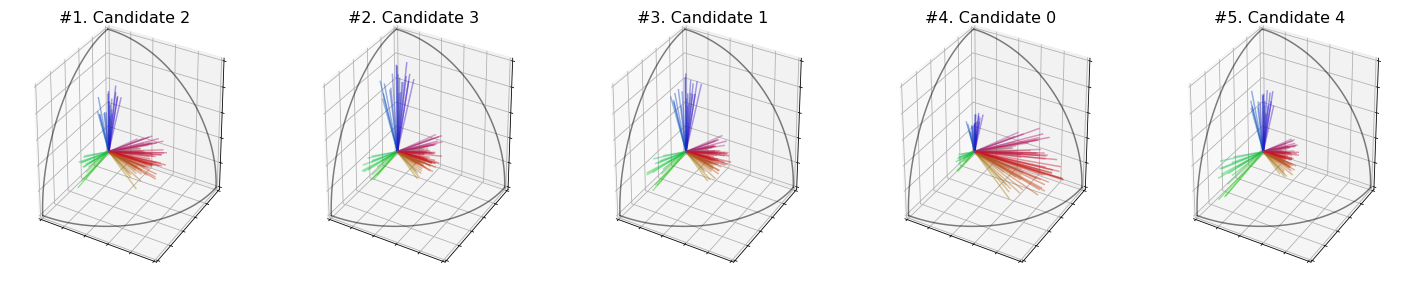

In [12]:
result = ev.ZonotopeRule(profile)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

### MaxCube

Scores :  [(3, 0.304120999933092), (3, 0.42097456903478475), (3, 0.4066519141740845), (3, 0.4108061119760138), (3, 0.38161479125231196)]
Ranking :  [1 3 2 4 0]
Winner :  1


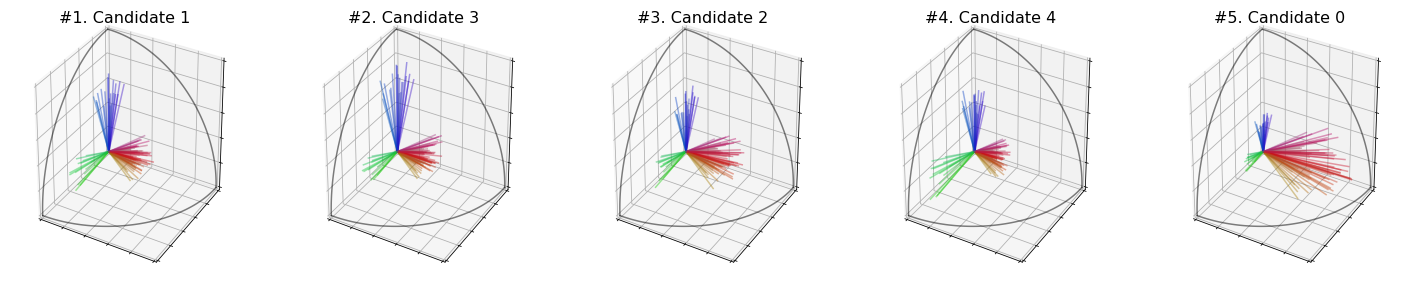

In [13]:
result = ev.MaxCubeRule(profile)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

### SVD Based rules

Scores :  [35.25250831664504, 41.43911240349595, 41.00146769833586, 43.089575637838536, 38.688573892764786]
Ranking :  [3 1 2 4 0]
Winner :  3


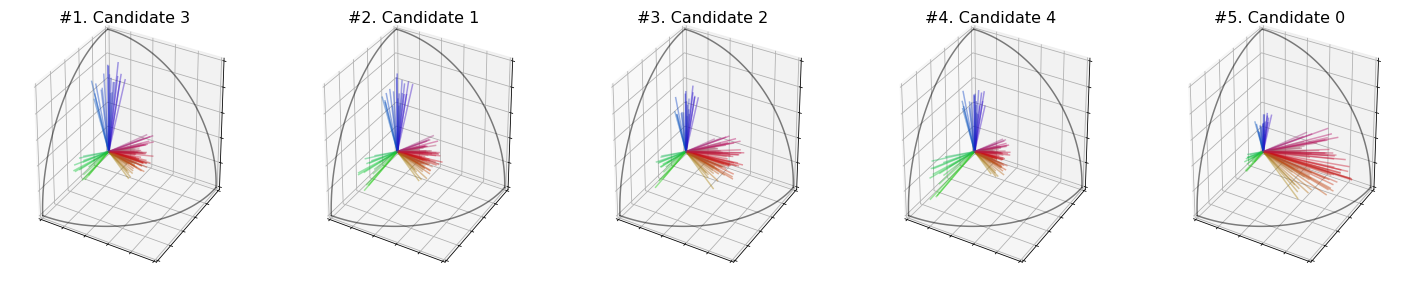

In [14]:
result = ev.SVDRule(profile, aggregation_rule=np.prod, use_rank=False, square_root=True)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

Scores :  [35.25250831664504, 41.43911240349595, 41.00146769833586, 43.089575637838536, 38.688573892764786]
Ranking :  [3 1 2 4 0]
Winner :  3


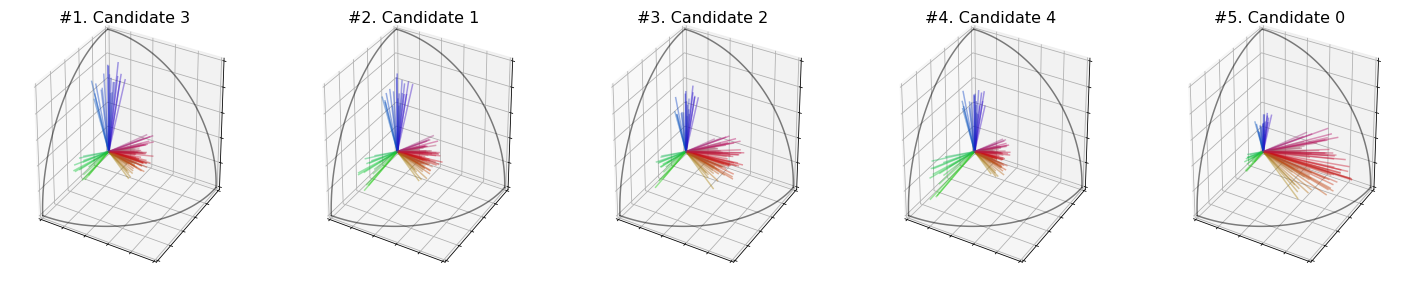

In [15]:
result = ev.SVDNash(profile, use_rank=False)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

Scores :  [11.376021448622648, 11.010701223469004, 11.198581127035462, 11.192264982503636, 10.67032823206445]
Ranking :  [0 2 3 1 4]
Winner :  0


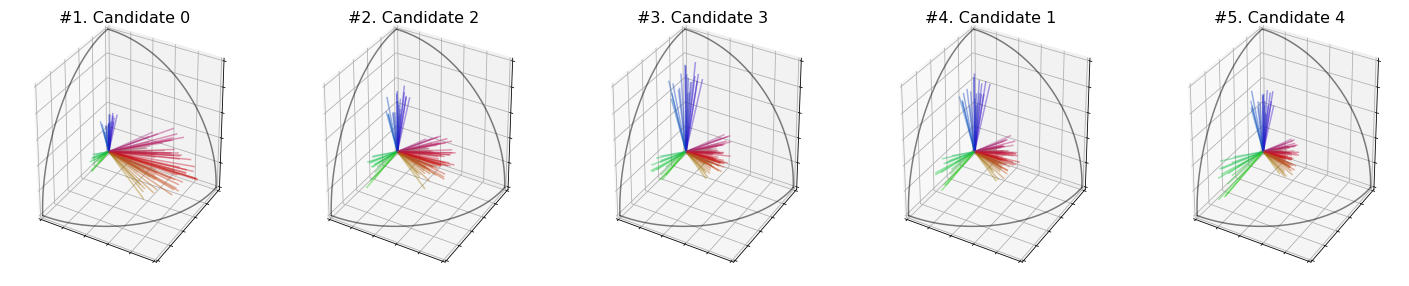

In [16]:
result = ev.SVDSum(profile, use_rank=False)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

Scores :  [2.0399251890169277, 2.469826921342843, 2.357408917913111, 2.4101550524988262, 2.5408839304550797]
Ranking :  [4 1 3 2 0]
Winner :  4


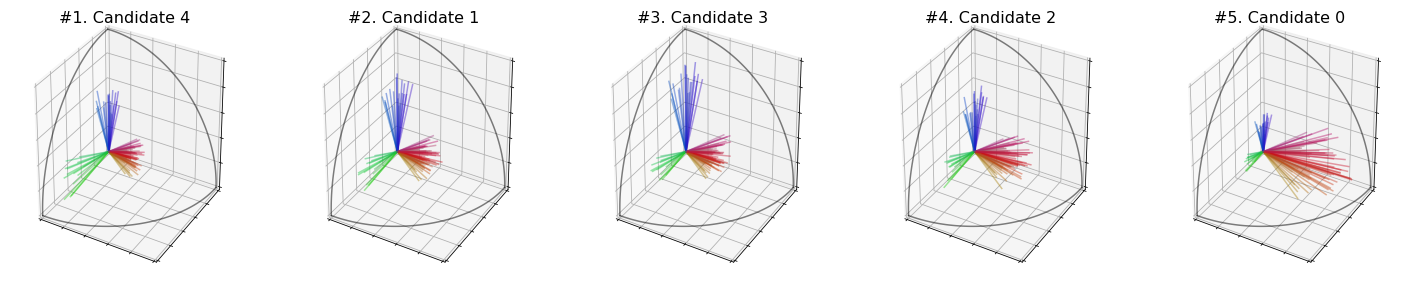

In [17]:
result = ev.SVDMin(profile, use_rank=False)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

Scores :  [6.791582511600026, 5.478116410259217, 5.886526973366904, 5.57554725331629, 5.202941381070343]
Ranking :  [0 2 3 1 4]
Winner :  0


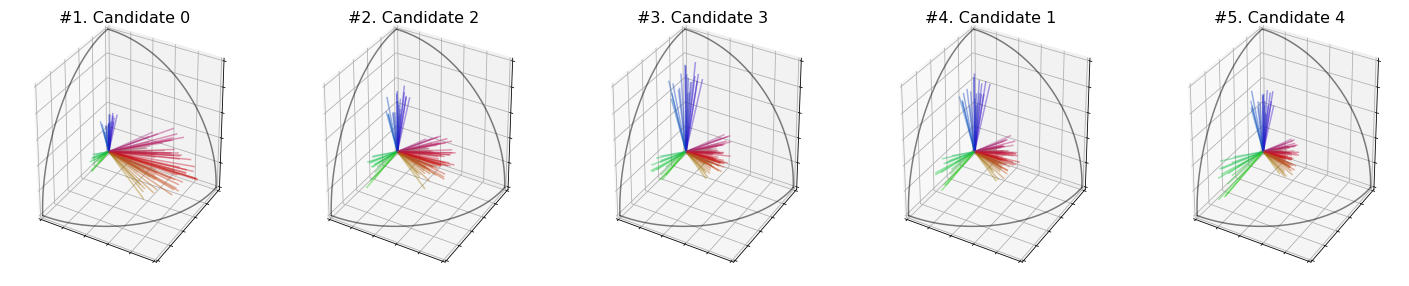

In [18]:
result = ev.SVDMax(profile, use_rank=False)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

Scores :  [4.430277877029673, 4.514396531535376, 4.515627308321489, 4.546761415105786, 4.457149177332543]
Ranking :  [3 2 1 4 0]
Winner :  3


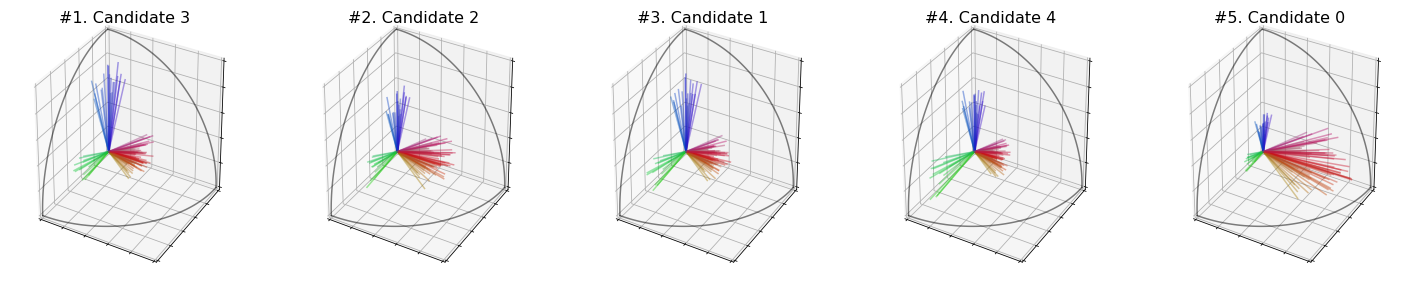

In [19]:
result = ev.SVDLog(profile, use_rank=False)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

### Features based rule

Scores :  [0.5480161939034447, 0.4401645803111295, 0.3719064010343661, 0.515862234098017, 0.5096411045256142]
Ranking :  [0 3 4 1 2]
Winner :  0


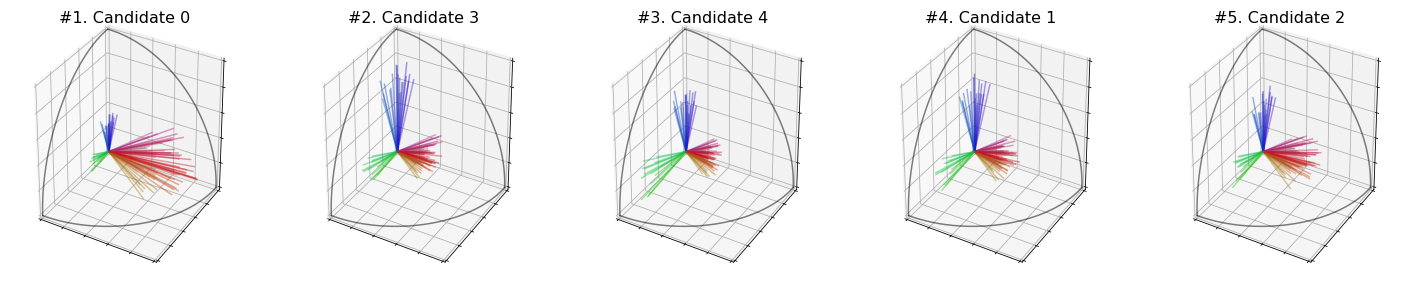

In [20]:
result = ev.FeaturesRule(profile)
print('Scores : ', result.scores_)
print('Ranking : ', result.ranking_)
print('Winner : ', result.winner_)
result.plot_ranking("3D")

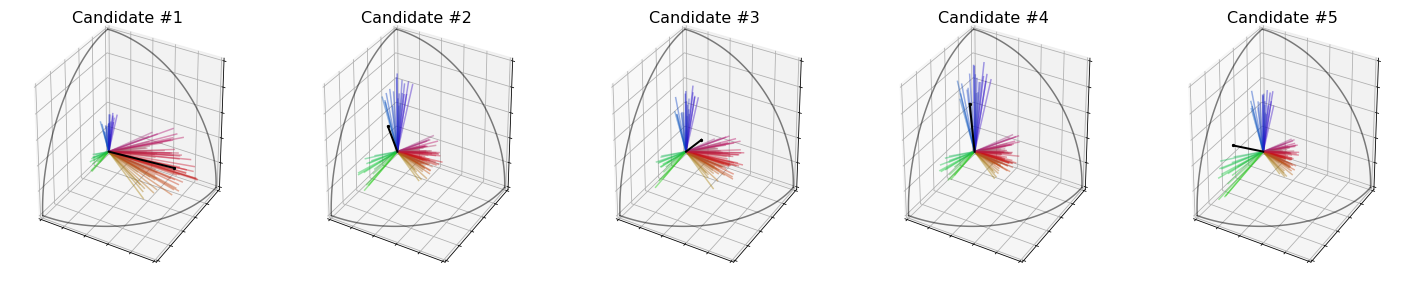

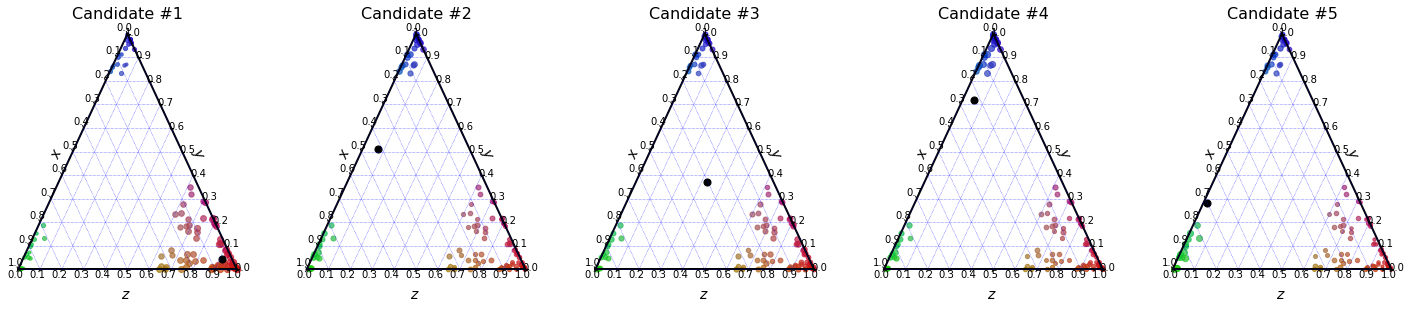

In [21]:
result.plot_features("3D")
result.plot_features("ternary")

## Extension to ordinal rules

In [22]:
ev.BordaExtension(profile)

AttributeError: 'NoneType' object has no attribute 'n_candidates'